In [1]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Functions

In [2]:
def get_comparison_ratings_for_user(completed_df,df_not_13, user_id, verbose = True):
    
    """
    This function takes a reviewer ID from the non 2013 dataset 
    and finds products common with that user in the 2013 completed matrix. 
    It generates a dataframe with common products and respective reviews, 
    in 2013 predicted and non-2013 actual. It also adds a difference column
    comparing the actual ratings with predicted ratings. 
    
    inputs:
    completed_df = this is the predicted 2013 dataframe from the uvt multiplication 
    df_not_13 = this is the raw data of product id and ratings but with 2013 ratings (training) set removed
    user_id = the reviewer for which we want to pull all the products
    
    output: 
    output_df = a dataframe containing reviewer id (user), the predicted rating in 2013, the actual rating outside 2013
    """
    output_df = pd.DataFrame()
    
    # proceed if the user is found in 2013 dataset
    if completed_df[completed_df.index==user_id].shape[0]> 0:

        # get common products:
        #       1) products present in 2013 for which ratings were predicted
        #       2) products outside 2013 for which ratings were made by the user
        try : 
            del l1, l2, l3
        except: 
            pass
        l1 = list(df_not_13[df_not_13.reviewerid==user_id]['productid'])
        l2 = completed_df.columns
        l3 = [value for value in l1 if value in l2] 
        if verbose: 
            print(user_id + ' : found ' + "{:,}".format(len(l3)) + ' common products')

        if len(l3)==0:
            output_df = pd.DataFrame()
            return(output_df)
        
        # get 2013 dataframe of common products
        common_products = completed_df[completed_df.index==user_id][l3].transpose().reset_index()
        common_products.columns = ['productid','predicted_rating']
        common_products.loc[:,'reviewerid'] = user_id
        
        # combine 2013 ratings with non-2013 ratings
        output_df = df_not_13.merge(common_products, how = 'inner', on = ['productid','reviewerid'])
        output_df.loc[:,'rating_diff'] = output_df.rating-output_df.predicted_rating
    return(output_df)



def get_rmse(df):
    return((df.rating_diff ** 2).mean() ** .5)

---

# Variables

In [3]:
category_name = 'baby'
reviews_categoryname_loc = './data_out/databases/baby.h5'
productid_mapping_loc = './data_in/dictionaries/product_baby_dict.txt'
reviewerid_mapping_loc = './data_in/dictionaries/review_baby_dict.txt'
completed_matrix_loc = "./data_out/uvt/baby.pickle"
plot_path = './data_out/plots/'

# Read Data

Read the initial product, reviewer, ratings dataframe and segment the datasets into 2013 and non 2013 ratings. 

In [4]:
df = pd.read_hdf(reviews_categoryname_loc,key = 'df_reviews_categoryname')
df.loc[:,'year'] = pd.to_datetime(df.timestamp, unit='s').apply(lambda x: x.year)
df_not_13 = df.loc[df.year!=2013,['productid','reviewerid','rating']]
df_13 = df.loc[df.year==2013,['productid','reviewerid','rating']]
# df_13_pivoted = df_13.pivot(index='reviewerid', columns='productid',values='rating').reset_index()

Read the dictionary mappings of each and row and column to their respective reviewer and products and join them with the completed 2013 ratings matrix 

In [6]:
df_productid_dict= pd.read_csv(productid_mapping_loc, header = None, sep = ' ')
df_reviewerid_dict = pd.read_csv(reviewerid_mapping_loc, header = None, sep = ' ')
product_ids = list(df_productid_dict[0])
reviewer_ids = list(df_reviewerid_dict[0])

In [7]:
completed_pickle_obj = open(completed_matrix_loc,'rb')
completed_array = pickle.load(completed_pickle_obj)
completed_df = pd.DataFrame(completed_array)

completed_df.columns = product_ids
completed_df.index = reviewer_ids
completed_df.head()

,097293751X,9729375011,B00000J3LL,B00002JV9S,B00002JXFI,B00003TKWE,B00003TL7P,B00003XAKP,B00003XAKR,B000046S3T,...,B00G34TJWM,B00G34TL48,B00G9F4MHW,B00GDKEM1E,B00GJVLOYA,B00GM35RFC,B00GMR18OM,B00JLHWDO4,B00JLI73ZM,B00L13XFIE
A1HK2FQW6KXQB2,4.824898,5.151776,4.664307,3.848351,3.987420,5.535802,3.022793,4.115789,4.389855,3.450583,...,4.933279,3.262543,2.824329,3.652562,3.098044,4.082488,4.807960,4.858067,4.554644,4.851266
A19K65VY14D13R,5.004679,5.270271,4.979723,3.887238,4.241139,5.819614,2.993031,3.900176,4.596587,3.897115,...,5.007439,3.006089,2.467493,4.222363,3.570331,3.966366,5.021394,5.013075,4.455885,5.100979
A5G19RYX8599E,4.508044,4.268963,4.535805,4.361622,4.223241,4.865681,2.384701,3.151150,4.654269,2.625126,...,4.330157,2.299499,1.918338,3.011420,1.887220,3.505236,4.085035,3.692988,4.704817,4.380922
ATZDT4B1U7NL,4.155733,3.134349,4.361739,4.517297,3.205598,3.957374,1.685035,2.291572,3.850481,0.648274,...,4.201398,1.717778,2.476123,1.717536,1.082040,2.387293,3.339004,2.570243,3.927834,3.698386
A3NMPMELAZC8ZY,4.258142,4.098425,4.365347,3.942532,4.136455,4.736239,2.223900,2.793375,4.461510,2.977182,...,3.989722,1.957695,1.391355,3.335107,2.188724,3.219286,3.956529,3.608797,4.265052,4.241392


#### correct out of range predictions

In [10]:
completed_df[(completed_df>5)]=5

In [11]:
completed_df[(completed_df<1)]=1

----

# Analyze Data

Find the top reviewers by number of products reviews outside training set i.e. outside 2013.
That is our best bet for analyzing this data

In [14]:
user_and_productid_ratings = df_not_13.groupby('reviewerid', as_index=False).agg({'productid':'count'}).sort_values('productid', ascending = False)
user_and_productid_ratings.head(3)

,reviewerid,productid
14297,AJGU56YG8G1DQ,89
13804,AF8SREA2XE7BJ,76
2647,A1M5ZT35YX6TIN,64


_Most reviewers review fewer than 20 products in this data_

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1485cfe48>]],
      dtype=object)

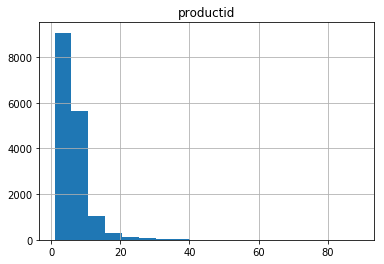

In [15]:
user_and_productid_ratings.hist('productid', bins=18)

/Users/kanwal/miniconda3/envs/py3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


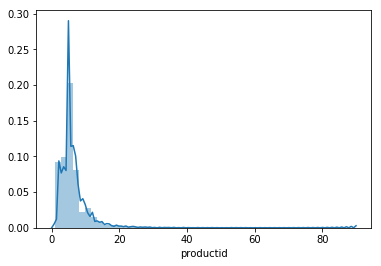

In [16]:
sns.distplot(user_and_productid_ratings['productid'], hist=True, kde=True)

# Analyze the data - Aggregate

1a) Get all reviewers who have rated 5 or more products outside 2013 and reviewed some product in 2013

In [17]:
# reviewers who rated 5 or more products outside 2013
greater_than_five_reviews = user_and_productid_ratings[user_and_productid_ratings.productid>=5]
hyper_reviewers = list(greater_than_five_reviews.reviewerid)

# reviewers present in 2013 already calculated earlier and stored: reviewer_ids

# find common reviewers
common_reviewers_list = [value for value in reviewer_ids if value in hyper_reviewers] 

print("{:,}".format(len(common_reviewers_list)) + ' - num of common reviewers')

3,810 - num of common reviewers


1b) consolidate all reviewers ratings into a single dataframe

In [18]:
consolidated_ratings_comparison = pd.DataFrame()
for reviewerid_value in common_reviewers_list:
    user_ratings_comparison = get_comparison_ratings_for_user(completed_df,df_not_13, reviewerid_value, verbose = False)
    consolidated_ratings_comparison = consolidated_ratings_comparison.append(user_ratings_comparison)

In [189]:
consolidated_ratings_comparison.head(2)

,productid,reviewerid,rating,predicted_rating,rating_diff
0,B00BM3VSYQ,A2Q2A6JKY95RTP,4.0,3.558381,0.441619
1,B00D4LFC2S,A2Q2A6JKY95RTP,5.0,4.244512,0.755488


2) calculate average product ratings and calculate the difference between average and predicted

In [22]:
average_ratings_products = consolidated_ratings_comparison.groupby('productid', as_index=False).agg({'rating':'mean','predicted_rating':'mean'})
average_ratings_products.columns = ['productid','actual_ratings_mean_by_product','predicted_ratings_mean_by_product']
average_ratings_products.loc[:,'prediction_error_ratings_mean_by_product'] = average_ratings_products.actual_ratings_mean_by_product - average_ratings_products.predicted_ratings_mean_by_product

In [83]:
average_ratings_users = consolidated_ratings_comparison.groupby('reviewerid', as_index=False).agg({'rating':'mean','predicted_rating':'mean'})
average_ratings_users.columns = ['reviewerid','actual_ratings_mean_by_user','predicted_ratings_mean_by_user']
average_ratings_users.loc[:,'prediction_error_ratings_mean_by_user'] = average_ratings_users.actual_ratings_mean_by_user - average_ratings_users.predicted_ratings_mean_by_user

3) combine the product ratings means with user ratings

In [86]:
consolidated_ratings_comparison_with_mean_product_ratings = consolidated_ratings_comparison.merge(average_ratings_products, how='inner', on = 'productid')
print(len(consolidated_ratings_comparison_with_mean_product_ratings.productid.unique()))
print(consolidated_ratings_comparison_with_mean_product_ratings.shape)
print(consolidated_ratings_comparison.shape)


consolidated_ratings_comparison_with_mean_product_ratings = consolidated_ratings_comparison_with_mean_product_ratings.merge(average_ratings_users, how = 'inner', on = 'reviewerid')
print(len(consolidated_ratings_comparison_with_mean_product_ratings.reviewerid.unique()))
print(consolidated_ratings_comparison_with_mean_product_ratings.shape)
# print(consolidated_ratings_comparison_with_mean_product_ratings.shape)

5294
(31027, 8)
(31027, 5)
3807
(31027, 11)


4) Add the matrix mean of ratings

In [197]:
consolidated_ratings_comparison_with_mean_product_ratings.loc[:,'matrix_mean'] = consolidated_ratings_comparison['rating'].mean()
consolidated_ratings_comparison_with_mean_product_ratings.loc[:,'predicted_rating-matrix_mean'] = consolidated_ratings_comparison_with_mean_product_ratings['predicted_rating'] - consolidated_ratings_comparison_with_mean_product_ratings['matrix_mean']
consolidated_ratings_comparison_with_mean_product_ratings.loc[:,'predicted_rating-predicted_ratings_mean_by_product'] = consolidated_ratings_comparison_with_mean_product_ratings['predicted_rating'] - consolidated_ratings_comparison_with_mean_product_ratings['predicted_ratings_mean_by_product']
consolidated_ratings_comparison_with_mean_product_ratings.loc[:,'predicted_rating-predicted_ratings_mean_by_user'] = consolidated_ratings_comparison_with_mean_product_ratings['predicted_rating'] - consolidated_ratings_comparison_with_mean_product_ratings['predicted_ratings_mean_by_user']
consolidated_ratings_comparison_with_mean_product_ratings.loc[:,'predicted_rating-actual_ratings_mean_by_product'] = consolidated_ratings_comparison_with_mean_product_ratings['predicted_rating'] - consolidated_ratings_comparison_with_mean_product_ratings['actual_ratings_mean_by_product']

consolidated_ratings_comparison_with_mean_product_ratings.loc[:,'predicted_rating-actual_ratings_mean_by_user'] = consolidated_ratings_comparison_with_mean_product_ratings['predicted_rating'] - consolidated_ratings_comparison_with_mean_product_ratings['actual_ratings_mean_by_user']
consolidated_ratings_comparison_with_mean_product_ratings.loc[:,'actual_rating-matrix_mean'] = consolidated_ratings_comparison_with_mean_product_ratings['rating'] - consolidated_ratings_comparison_with_mean_product_ratings['matrix_mean']
consolidated_ratings_comparison_with_mean_product_ratings.loc[:,'actual_rating-actual_ratings_mean_by_product'] = consolidated_ratings_comparison_with_mean_product_ratings['rating'] - consolidated_ratings_comparison_with_mean_product_ratings['actual_ratings_mean_by_product']
consolidated_ratings_comparison_with_mean_product_ratings.loc[:,'actual_rating-actual_ratings_mean_by_user'] = consolidated_ratings_comparison_with_mean_product_ratings['rating'] - consolidated_ratings_comparison_with_mean_product_ratings['actual_ratings_mean_by_user']


In [88]:
consolidated_ratings_comparison_with_mean_product_ratings.head()

,productid,reviewerid,rating,predicted_rating,rating_diff,actual_ratings_mean_by_product,predicted_ratings_mean_by_product,prediction_error_ratings_mean_by_product,actual_ratings_mean_by_user,predicted_ratings_mean_by_user,prediction_error_ratings_mean_by_user,matrix_mean,predicted_rating-matrix_mean,predicted_rating-predicted_ratings_mean_by_product,actual_rating-matrix_mean,actual_rating-actual_ratings_mean_by_product
0,B00BM3VSYQ,A2Q2A6JKY95RTP,4.0,3.558381,0.441619,4.000000,3.967878,0.032122,4.666667,4.126695,0.539971,4.184452,-0.626071,-0.409497,-0.184452,0.000000
1,B00D4LFC2S,A2Q2A6JKY95RTP,5.0,4.244512,0.755488,4.785714,4.097818,0.687897,4.666667,4.126695,0.539971,4.184452,0.060060,0.146694,0.815548,0.214286
2,B00EU5AHK4,A2Q2A6JKY95RTP,5.0,4.577193,0.422807,4.272727,4.895889,-0.623162,4.666667,4.126695,0.539971,4.184452,0.392741,-0.318696,0.815548,0.727273
3,B00BM3VSYQ,A10ZBR6O8S8OCY,3.0,3.878962,-0.878962,4.000000,3.967878,0.032122,4.285714,3.823513,0.462201,4.184452,-0.305490,-0.088916,-1.184452,-1.000000
4,B0083BQ0EI,A10ZBR6O8S8OCY,5.0,3.858312,1.141688,4.333333,3.375108,0.958225,4.285714,3.823513,0.462201,4.184452,-0.326140,0.483204,0.815548,0.666667


# PERFORMANCE MEASURES

## OVERALL PERFORMANCE

/Users/kanwal/miniconda3/envs/py3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


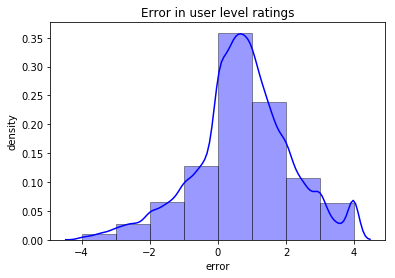

In [190]:
sns.distplot(consolidated_ratings_comparison_with_mean_product_ratings['rating_diff'], hist=True, kde=True, 
             bins=8, color = 'blue',
             hist_kws={'edgecolor':'black'})

plt.title('Error in user level ratings')
plt.xlabel('error')
plt.ylabel('density')

plt.savefig('./data_out/plots/' + category_name + '_density_user_level_ratings_error.pdf')

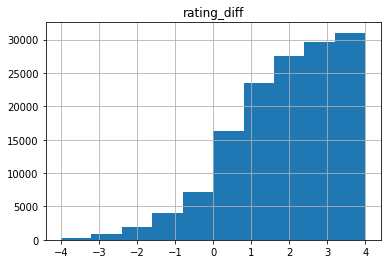

In [52]:
# where are the biggest jumps (if around 0, we are good)
consolidated_ratings_comparison.hist( 'rating_diff',cumulative = True )
plt.savefig('./data_out/plots/' + category_name + '_cumulative_user_level_ratings_diff.pdf')

In [192]:
series_ = consolidated_ratings_comparison.rating_diff
print('mean of ratings errors: ' + "{:.1f}".format(np.mean(series_),1))
print('median ratings errors: ' + "{:.1f}".format(np.median(series_),1))
print('RMSE : ' + "{:.2f}".format(((series_ ** 2).mean() ** .5)))

mean of ratings errors: 0.7
median ratings errors: 0.7
RMSE : 1.60


## PREDICTIONS RELATIVE TO AVERAGE PRODUCT RATINGS

#### Is our product level prediction actually accurate?

_Compare: average product rating with averate predicted product rating_
_ if we are centred around 0, we are pretty good_

In [203]:
# Difference from the mean product ratings
series_ = consolidated_ratings_comparison_with_mean_product_ratings['predicted_rating-actual_ratings_mean_by_product']
print('mean of product level ratings errors: ' + "{:.1f}".format(np.mean(series_),1))
print('median of product level ratings errors: ' + "{:.1f}".format(np.median(series_),1))
print('RMSE : ' + "{:.2f}".format(((series_ ** 2).mean() ** .5)))

mean of product level ratings errors: -0.7
median of product level ratings errors: -0.6
RMSE : 1.33


In [170]:
average_ratings_products.loc[:,'predicted_ratings_mean_by_product_rounded']=np.ceil(average_ratings_products.predicted_ratings_mean_by_product)
average_ratings_products.loc[:,'actual_ratings_mean_by_product_rounded']=np.ceil(average_ratings_products.actual_ratings_mean_by_product)

## PERFORMANCE OF PRODUCTS WITH DIFFERENT RATINGS

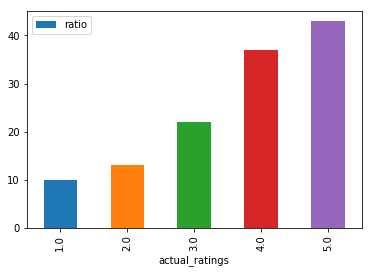

In [221]:
consolidated_ratings_comparison_with_mean_product_ratings.loc[:,'predicted_rating_rounded']=np.ceil(consolidated_ratings_comparison_with_mean_product_ratings.predicted_rating)
average_ratings_products_correct = consolidated_ratings_comparison_with_mean_product_ratings[consolidated_ratings_comparison_with_mean_product_ratings.rating==consolidated_ratings_comparison_with_mean_product_ratings.predicted_rating_rounded]
out = average_ratings_products_correct.groupby('rating', as_index=False).agg({'predicted_rating_rounded':['count']})
out.columns = ['actual_ratings','correct_counts']
out_denominator = consolidated_ratings_comparison_with_mean_product_ratings.groupby('rating', as_index=False).agg({'predicted_rating_rounded':['count']})
out_denominator.columns = ['actual_ratings','denominator_counts']
# 
out_consolidated = out.merge(out_denominator, how = 'inner', on = 'actual_ratings')
out_consolidated.loc[:,'ratio'] = np.round(100.0*out_consolidated.correct_counts/out_consolidated.denominator_counts)

out_consolidated.plot(kind='bar',x='actual_ratings',y='ratio')

In [222]:
average_ratings_products_correct = average_ratings_products[average_ratings_products.actual_ratings_mean_by_product_rounded==average_ratings_products.predicted_ratings_mean_by_product_rounded]
out = average_ratings_products_correct.groupby('actual_ratings_mean_by_product_rounded', as_index=False).agg({'predicted_ratings_mean_by_product':['count']})
out.columns = ['actual_ratings','correct_counts']
out_denominator = average_ratings_products.groupby('actual_ratings_mean_by_product_rounded', as_index=False).agg({'predicted_ratings_mean_by_product':['count']})
out_denominator.columns = ['actual_ratings','denominator_counts']
# 
out_consolidated = out.merge(out_denominator, how = 'inner', on = 'actual_ratings')
out_consolidated.loc[:,'ratio'] = np.round(100.0*out_consolidated.correct_counts/out_consolidated.denominator_counts)

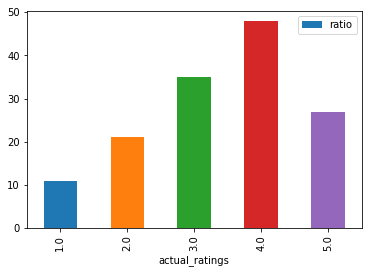

In [223]:
out_consolidated.plot(kind='bar',x='actual_ratings',y='ratio')

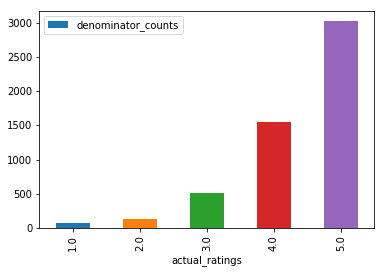

In [179]:
out_consolidated.plot(kind='bar',x='actual_ratings',y='denominator_counts')

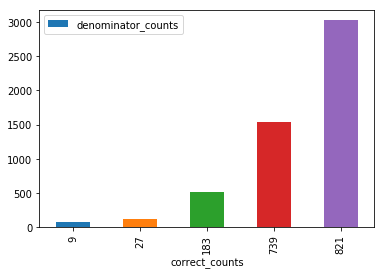

In [181]:
out_consolidated.plot(kind='bar',x='correct_counts',y='denominator_counts')

## PERFORMANCE RELATIVE TO MATRIX MEAN

Are we significantly different from matrix mean? Are individuals' ratings significantly different?

In [180]:
consolidated_ratings_comparison['rating'].mean()

4.184452251265027

/Users/kanwal/miniconda3/envs/py3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


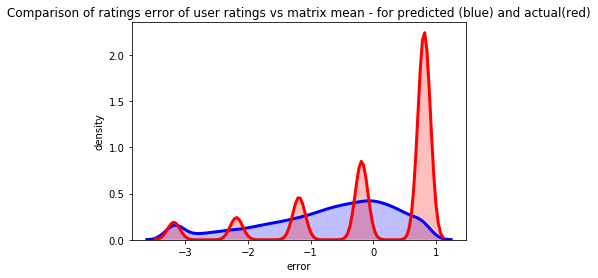

In [224]:
sns.distplot(consolidated_ratings_comparison_with_mean_product_ratings['predicted_rating-matrix_mean'], hist = False, kde=True, kde_kws = {'shade': True, 'linewidth': 3, 'color':'blue' })
sns.distplot(consolidated_ratings_comparison_with_mean_product_ratings['actual_rating-matrix_mean'], hist = False, kde=True, kde_kws = {'shade': True, 'linewidth': 3, 'color':'red'})

plt.title('Comparison of ratings error of user ratings vs matrix mean - for predicted (blue) and actual(red)')
plt.xlabel('error')
plt.ylabel('density')


plt.savefig('./data_out/plots/' + category_name + '_ratings_significantly_different_from_matrix_mean.pdf')

In [105]:
# average_ratings_products.hist(column='prediction_error_ratings_mean_by_product', bins = 8)
series_ = consolidated_ratings_comparison_with_mean_product_ratings['actual_rating-matrix_mean']
print('mean of actual rating - matrix mean: ' + "{:.1f}".format(np.mean(series_),1))
print('median of actual rating - matrix mean: ' + "{:.1f}".format(np.median(series_),1))
print('RMSE : ' + "{:.2f}".format(((series_ ** 2).mean() ** .5)))

mean of actual rating - matrix mean: 0.0
median of actual rating - matrix mean: 0.8
RMSE : 1.15


In [102]:
# average_ratings_products.hist(column='prediction_error_ratings_mean_by_product', bins = 8)
series_ = consolidated_ratings_comparison_with_mean_product_ratings['predicted_rating-matrix_mean']
print('mean of predicted rating - matrix mean: ' + "{:.1f}".format(np.mean(series_),1))
print('median of predicted rating - matrix mean: ' + "{:.1f}".format(np.median(series_),1))
print('RMSE : ' + "{:.2f}".format(((series_ ** 2).mean() ** .5)))

mean of predicted rating - matrix mean: -0.7
median of predicted rating - matrix mean: -0.5
RMSE : 1.30


## PERFORMANCE RELATIVE TO PRODUCT MEANS

We want to see the difference between user level predicted ratings and the  average product predicted ratings.
We also want to compare that distribution to the difference between actual ratings and the average product ratings. 

Turns out they are not so different. 
The chart below shows that products rated by individuals are closer to the average product ratings. Our predictions follow a similar trend

/Users/kanwal/miniconda3/envs/py3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


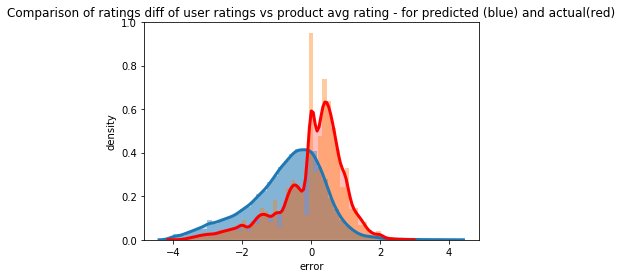

In [225]:
sns.distplot(consolidated_ratings_comparison_with_mean_product_ratings['predicted_rating-actual_ratings_mean_by_product'], kde=True, 
             kde_kws = {'shade': True, 'linewidth': 3})

sns.distplot(consolidated_ratings_comparison_with_mean_product_ratings['actual_rating-actual_ratings_mean_by_product'], kde=True, 
             kde_kws = {'shade': True, 'linewidth': 3, 'color':'red'})

plt.title('Comparison of ratings diff of user ratings vs product avg rating - for predicted (blue) and actual(red)')
plt.xlabel('error')
plt.ylabel('density')

plt.savefig('./data_out/plots/' + category_name + '_density_user_level_compare_ratings_with_avg_product_ratings.pdf')

## Are our user level predictions significantly different from user means

/Users/kanwal/miniconda3/envs/py3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


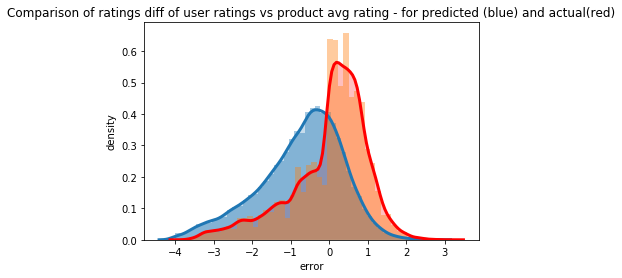

In [226]:
sns.distplot(consolidated_ratings_comparison_with_mean_product_ratings['predicted_rating-actual_ratings_mean_by_user'], kde=True, 
             kde_kws = {'shade': True, 'linewidth': 3})

sns.distplot(consolidated_ratings_comparison_with_mean_product_ratings['actual_rating-actual_ratings_mean_by_user'], kde=True, 
             kde_kws = {'shade': True, 'linewidth': 3, 'color':'red'})

plt.title('Comparison of ratings diff of user ratings vs product avg rating - for predicted (blue) and actual(red)')
plt.xlabel('error')
plt.ylabel('density')

plt.savefig('./data_out/plots/' + category_name + '_density_user_level_compare_ratings_with_avg_user_ratings.pdf')